# Storytelling Data Visualization on Exchange Rates

The dataset that will be used describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — I downloaded it on January 2021.

## 1. Introducing the Dataset

In [1]:
# Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
# Reading the dataset
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
# First five rows of the dataset
exchange_rates.head(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123


In [4]:
# Last five rows of the dataset
exchange_rates.tail(2)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

At a glance, we can see that:
- The number of rows is 5699, and column is 41
- There are null values in some columns, and it needs some data cleaning
- Data type in are String and Float

## 2. Data Cleaning

Our focus in this part of the project will be on the exchange rate between the euro and the American dollar.
- Rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
- Change the Time column to a datetime data type.
- Sort the values by Time in ascending order.
- Reset the index (and drop the initial index).

In [6]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
# Isolate Time and US_dollar columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [8]:
# Check for value count in US_dollar columns
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     6
          ..
1.4225     1
1.3580     1
1.4127     1
0.9561     1
1.1278     1
Name: US_dollar, Length: 3528, dtype: int64

It seems that some rows has a value of "-" and it needs to be cleaned.

In [9]:
# Drop all the rows where the value is "-"
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [10]:
# Convert US_dollar column to a float data type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [11]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## 3. Rolling Mean

If using default line's shape, we will see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

In [12]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [13]:
euro_to_dollar.head()

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN


In [14]:
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


## 4. Creating a Graph

The graph willl show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). I will use a line plot.

In [15]:
# Adding the year column
euro_to_dollar['year']=pd.DatetimeIndex(euro_to_dollar['Time']).year

# Selecting only year 2001 to 2021
year_2001_2021 = euro_to_dollar[(euro_to_dollar['year'] >= 2001) 
                                & (euro_to_dollar['year'] <= 2021)]

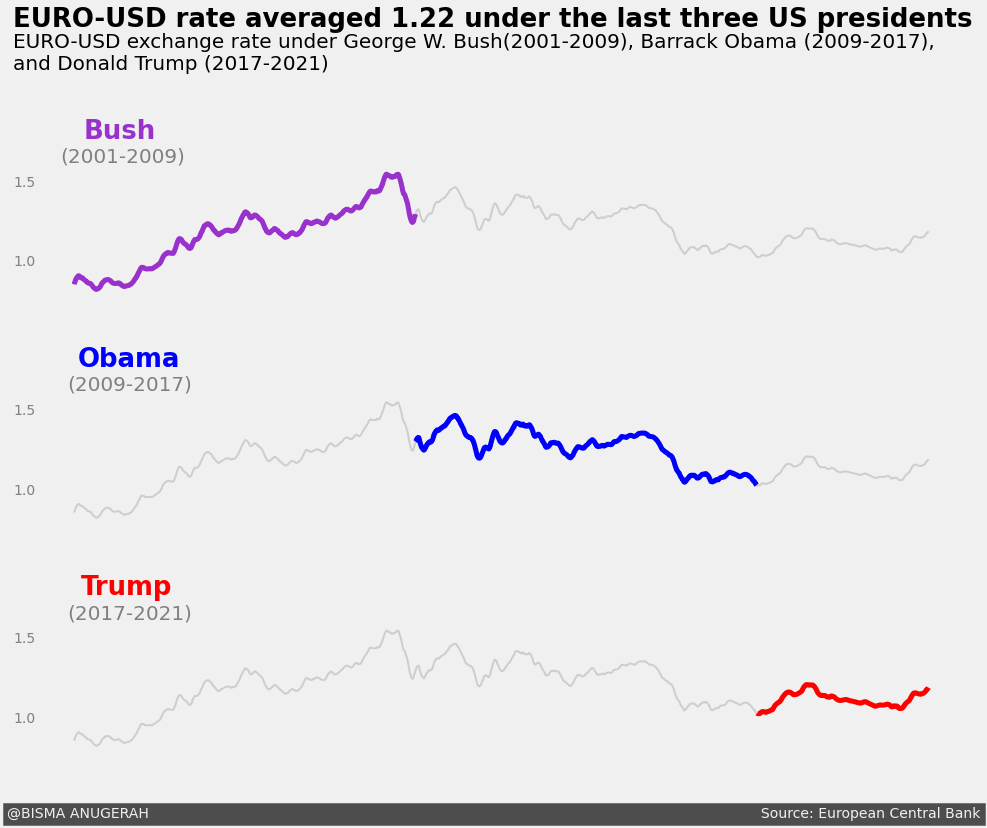

In [16]:
# Selecting a theme for the graph
style.use('fivethirtyeight')

# Creating a grid chart for the last three presidents
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15, 10)
plt.subplots_adjust(hspace=0.8)
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(year_2001_2021['Time'], year_2001_2021['rolling_mean'], 
           color='grey', alpha=0.3, lw=2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    
# Plotting each Euro-USD rate for each president
ax1.plot(year_2001_2021[(year_2001_2021['year'] >= 2001)
                        & (year_2001_2021['year'] < 2009)]['Time'],
        year_2001_2021[(year_2001_2021['year'] >= 2001)
                        & (year_2001_2021['year'] < 2009)]['rolling_mean'],
        linewidth=5, color='darkorchid')
ax2.plot(year_2001_2021[(year_2001_2021['year'] >= 2009)
                        & (year_2001_2021['year'] < 2017)]['Time'],
        year_2001_2021[(year_2001_2021['year'] >= 2009)
                        & (year_2001_2021['year'] < 2017)]['rolling_mean'],
        linewidth=5, color='blue')
ax3.plot(year_2001_2021[(year_2001_2021['year'] >= 2017)
                        & (year_2001_2021['year'] <= 2021)]['Time'],
        year_2001_2021[(year_2001_2021['year'] >= 2017)
                        & (year_2001_2021['year'] <= 2021)]['rolling_mean'],
        linewidth=5, color='red')

# Create a title and subtitle
ax1.text(x=10800, y=2.5, s='EURO-USD rate averaged 1.22 under the last three US presidents', 
        size=26, weight='bold')
ax1.text(x=10800, y=2.25, s='''EURO-USD exchange rate under George W. Bush(2001-2009), Barrack Obama (2009-2017), 
and Donald Trump (2017-2021)''', 
         size=20, wrap=True)

# Creating a subtitle for each president
ax1.text(x=11400, y=1.8, s="Bush", size=26, weight='bold', color='darkorchid')
ax1.text(x=11200, y=1.65, s="(2001-2009)", size=20, color='grey')
ax1.text(x=10800, y=1.5, s='1.5', color='grey')
ax1.text(x=10800, y=1.0, s='1.0', color='grey')

ax2.text(x=11350, y=1.8, s="Obama", size=26, weight='bold', color='blue')
ax2.text(x=11260, y=1.65, s="(2009-2017)", size=20, color='grey')
ax2.text(x=10800, y=1.5, s='1.5', color='grey')
ax2.text(x=10800, y=1.0, s='1.0', color='grey')

ax3.text(x=11380, y=1.8, s="Trump", size=26, weight='bold', color='red')
ax3.text(x=11260, y=1.65, s="(2017-2021)", size=20, color='grey')
ax3.text(x=10800, y=1.5, s='1.5', color='grey')
ax3.text(x=10800, y=1.0, s='1.0', color='grey')

# Adding Signature
ax3.text(10750, 0.4, '@BISMA ANUGERAH' + ' '*136 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

#### From the above graph it can be concluded:
> 1. When Bush became president the Euro-USD rate increase to 1.5 in his last reign year
> 2. Bush period started to decrease the Euro-USD rate to 1.1
> 3. Trump is stagnant and not much change from the previous president